1- data processing
https://www.kaggle.com/datasets/muhammetvarl/laptop-price?select=laptop_price.csv

In [242]:
import pandas as pd

In [243]:
df = pd.read_csv('C:\\Users\\hp\\Documents\\dataset\\laptop_price.csv', encoding='latin-1')

In [244]:
df.head(5)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [245]:
#df.feature_name.value_counts()
df = df.drop('Product', axis=1)

In [246]:
#pd.get_dummies(df.Company)

df = df.join(pd.get_dummies(df.Company))
df = df.drop('Company', axis=1)

In [247]:
df.head(5)

,laptop_ID,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,...,LG,Lenovo,MSI,Mediacom,Microsoft,Razer,Samsung,Toshiba,Vero,Xiaomi
0,1,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,...,0,0,0,0,0,0,0,0,0,0
1,2,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,...,0,0,0,0,0,0,0,0,0,0
2,3,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,...,0,0,0,0,0,0,0,0,0,0
3,4,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,...,0,0,0,0,0,0,0,0,0,0
4,5,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,...,0,0,0,0,0,0,0,0,0,0


In [248]:
#pd.get_dummies(df.TypeName)

df = df.join(pd.get_dummies(df.TypeName))
df = df.drop('TypeName', axis=1)

In [249]:
df.head(5)

,laptop_ID,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,...,Samsung,Toshiba,Vero,Xiaomi,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation
0,1,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,...,0,0,0,0,0,0,0,0,1,0
1,2,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,...,0,0,0,0,0,0,0,0,1,0
2,3,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,...,0,0,0,0,0,0,0,1,0,0
3,4,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,...,0,0,0,0,0,0,0,0,1,0
4,5,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,...,0,0,0,0,0,0,0,0,1,0


In [250]:
#df.ScreenResolution.str.split(' ')

In [251]:
df['ScreenResolution'] = df.ScreenResolution.str.split(' ').apply(lambda x: x[-1])
df['Screen Width'] = df.ScreenResolution.str.split('x').apply(lambda x: x[0])
df['Screen Height'] = df.ScreenResolution.str.split('x').apply(lambda x: x[1])

In [252]:
df.head(5)

,laptop_ID,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,...,Vero,Xiaomi,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation,Screen Width,Screen Height
0,1,13.3,2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,...,0,0,0,0,0,0,1,0,2560,1600
1,2,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,...,0,0,0,0,0,0,1,0,1440,900
2,3,15.6,1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,...,0,0,0,0,0,1,0,0,1920,1080
3,4,15.4,2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,...,0,0,0,0,0,0,1,0,2880,1800
4,5,13.3,2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,...,0,0,0,0,0,0,1,0,2560,1600


In [253]:
df = df.drop('ScreenResolution', axis=1)

In [254]:
df.head(5)

,laptop_ID,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Acer,...,Vero,Xiaomi,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation,Screen Width,Screen Height
0,1,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,0,...,0,0,0,0,0,0,1,0,2560,1600
1,2,13.3,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,0,...,0,0,0,0,0,0,1,0,1440,900
2,3,15.6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,0,...,0,0,0,0,0,1,0,0,1920,1080
3,4,15.4,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,0,...,0,0,0,0,0,0,1,0,2880,1800
4,5,13.3,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,0,...,0,0,0,0,0,0,1,0,2560,1600


In [255]:
df.Cpu.str.split(' ').apply(lambda x: x[0])

0       Intel
1       Intel
2       Intel
3       Intel
4       Intel
        ...  
1298    Intel
1299    Intel
1300    Intel
1301    Intel
1302    Intel
Name: Cpu, Length: 1303, dtype: object

In [256]:
df.Cpu.str.split(' ').apply(lambda x: x[-1])

0       2.3GHz
1       1.8GHz
2       2.5GHz
3       2.7GHz
4       3.1GHz
         ...  
1298    2.5GHz
1299    2.5GHz
1300    1.6GHz
1301    2.5GHz
1302    1.6GHz
Name: Cpu, Length: 1303, dtype: object

In [257]:
df['Cpu Brand'] = df.Cpu.str.split(' ').apply(lambda x: x[0])
df['Cpu Frequency'] = df.Cpu.str.split(' ').apply(lambda x: x[-1])
df = df.drop('Cpu', axis=1)

In [258]:
df.head(5)

,laptop_ID,Inches,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Acer,Apple,...,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation,Screen Width,Screen Height,Cpu Brand,Cpu Frequency
0,1,13.3,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,0,1,...,0,0,0,0,1,0,2560,1600,Intel,2.3GHz
1,2,13.3,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,0,1,...,0,0,0,0,1,0,1440,900,Intel,1.8GHz
2,3,15.6,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,0,0,...,0,0,0,1,0,0,1920,1080,Intel,2.5GHz
3,4,15.4,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,0,1,...,0,0,0,0,1,0,2880,1800,Intel,2.7GHz
4,5,13.3,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,0,1,...,0,0,0,0,1,0,2560,1600,Intel,3.1GHz


In [259]:
#remove letters from cpu frequency
df['Cpu Frequency'] = df['Cpu Frequency'].str[:-3]

In [260]:
df.head(5)

,laptop_ID,Inches,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Acer,Apple,...,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation,Screen Width,Screen Height,Cpu Brand,Cpu Frequency
0,1,13.3,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,0,1,...,0,0,0,0,1,0,2560,1600,Intel,2.3
1,2,13.3,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,0,1,...,0,0,0,0,1,0,1440,900,Intel,1.8
2,3,15.6,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,0,0,...,0,0,0,1,0,0,1920,1080,Intel,2.5
3,4,15.4,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,0,1,...,0,0,0,0,1,0,2880,1800,Intel,2.7
4,5,13.3,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,0,1,...,0,0,0,0,1,0,2560,1600,Intel,3.1


In [261]:
# remove letters from Ram
df['Ram'] = df['Ram'].str[:1]

In [262]:
df.head(5)

,laptop_ID,Inches,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Acer,Apple,...,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation,Screen Width,Screen Height,Cpu Brand,Cpu Frequency
0,1,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,0,1,...,0,0,0,0,1,0,2560,1600,Intel,2.3
1,2,13.3,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,0,1,...,0,0,0,0,1,0,1440,900,Intel,1.8
2,3,15.6,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,0,0,...,0,0,0,1,0,0,1920,1080,Intel,2.5
3,4,15.4,1,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,0,1,...,0,0,0,0,1,0,2880,1800,Intel,2.7
4,5,13.3,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,0,1,...,0,0,0,0,1,0,2560,1600,Intel,3.1


In [263]:
#Ram, memory, cpy_frequency are string, we should turn them into integer
df['Ram'] = df['Ram'].astype('int')
df['Cpu Frequency'] = df['Cpu Frequency'].astype('float')

df['Screen Width'] = df['Screen Width'].astype('int')
df['Screen Height'] = df['Screen Height'].astype('int')

array([[<Axes: title={'center': 'laptop_ID'}>,
        <Axes: title={'center': 'Inches'}>,
        <Axes: title={'center': 'Ram'}>,
        <Axes: title={'center': 'Price_euros'}>,
        <Axes: title={'center': 'Acer'}>,
        <Axes: title={'center': 'Apple'}>],
       [<Axes: title={'center': 'Asus'}>,
        <Axes: title={'center': 'Chuwi'}>,
        <Axes: title={'center': 'Dell'}>,
        <Axes: title={'center': 'Fujitsu'}>,
        <Axes: title={'center': 'Google'}>,
        <Axes: title={'center': 'HP'}>],
       [<Axes: title={'center': 'Huawei'}>,
        <Axes: title={'center': 'LG'}>,
        <Axes: title={'center': 'Lenovo'}>,
        <Axes: title={'center': 'MSI'}>,
        <Axes: title={'center': 'Mediacom'}>,
        <Axes: title={'center': 'Microsoft'}>],
       [<Axes: title={'center': 'Razer'}>,
        <Axes: title={'center': 'Samsung'}>,
        <Axes: title={'center': 'Toshiba'}>,
        <Axes: title={'center': 'Vero'}>,
        <Axes: title={'center': 'Xiaom

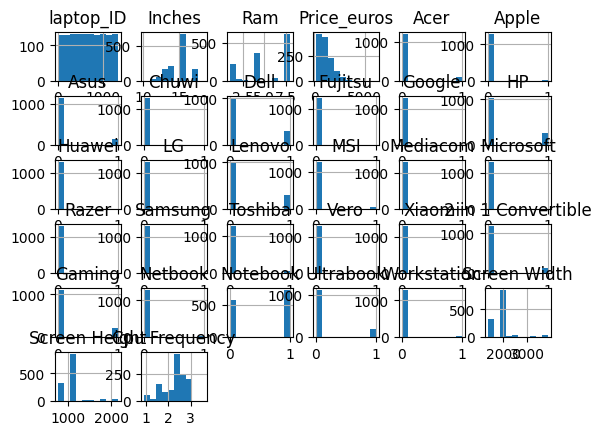

In [264]:
# hist function only takes the numerocal values (features)
df.hist()

In [265]:
df.head(5)

,laptop_ID,Inches,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Acer,Apple,...,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation,Screen Width,Screen Height,Cpu Brand,Cpu Frequency
0,1,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,0,1,...,0,0,0,0,1,0,2560,1600,Intel,2.3
1,2,13.3,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,0,1,...,0,0,0,0,1,0,1440,900,Intel,1.8
2,3,15.6,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,0,0,...,0,0,0,1,0,0,1920,1080,Intel,2.5
3,4,15.4,1,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,0,1,...,0,0,0,0,1,0,2880,1800,Intel,2.7
4,5,13.3,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,0,1,...,0,0,0,0,1,0,2560,1600,Intel,3.1


In [266]:
df['Memory Amount'] = df.Memory.str.split(' ').apply(lambda x: x[0])
df['Memory Type'] = df.Memory.str.split(' ').apply(lambda x: x[1])

In [267]:
df.head(5)

,laptop_ID,Inches,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Acer,Apple,...,Netbook,Notebook,Ultrabook,Workstation,Screen Width,Screen Height,Cpu Brand,Cpu Frequency,Memory Amount,Memory Type
0,1,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,0,1,...,0,0,1,0,2560,1600,Intel,2.3,128GB,SSD
1,2,13.3,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,0,1,...,0,0,1,0,1440,900,Intel,1.8,128GB,Flash
2,3,15.6,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,0,0,...,0,1,0,0,1920,1080,Intel,2.5,256GB,SSD
3,4,15.4,1,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,0,1,...,0,0,1,0,2880,1800,Intel,2.7,512GB,SSD
4,5,13.3,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,0,1,...,0,0,1,0,2560,1600,Intel,3.1,256GB,SSD


In [268]:
df['Memory Type'].value_counts()

SSD       843
HDD       375
Flash      75
Hybrid     10
Name: Memory Type, dtype: int64

In [269]:
df['Memory Amount'].value_counts()

256GB    508
1TB      240
128GB    177
512GB    140
500GB    132
32GB      45
64GB      17
2TB       16
1.0TB     10
16GB      10
180GB      5
240GB      1
8GB        1
508GB      1
Name: Memory Amount, dtype: int64

In [270]:
#for memory amount to take the string and turn it to a number
def turn_memory_into_MB(value):
    if 'GB' in value:
        return float(value[:value.find('GB')]) * 1000
    else:
        return float(value[:value.find('TB')]) * 1000000

In [271]:
df['Memory Amount'].apply(turn_memory_into_MB)

0        128000.0
1        128000.0
2        256000.0
3        512000.0
4        256000.0
          ...    
1298     128000.0
1299     512000.0
1300      64000.0
1301    1000000.0
1302     500000.0
Name: Memory Amount, Length: 1303, dtype: float64

In [272]:
df['Memory Amount'] = df['Memory Amount'].apply(turn_memory_into_MB)

In [273]:
df = df.drop('Memory', axis=1)
df.head(5)

,laptop_ID,Inches,Ram,Gpu,OpSys,Weight,Price_euros,Acer,Apple,Asus,...,Netbook,Notebook,Ultrabook,Workstation,Screen Width,Screen Height,Cpu Brand,Cpu Frequency,Memory Amount,Memory Type
0,1,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,0,1,0,...,0,0,1,0,2560,1600,Intel,2.3,128000.0,SSD
1,2,13.3,8,Intel HD Graphics 6000,macOS,1.34kg,898.94,0,1,0,...,0,0,1,0,1440,900,Intel,1.8,128000.0,Flash
2,3,15.6,8,Intel HD Graphics 620,No OS,1.86kg,575.00,0,0,0,...,0,1,0,0,1920,1080,Intel,2.5,256000.0,SSD
3,4,15.4,1,AMD Radeon Pro 455,macOS,1.83kg,2537.45,0,1,0,...,0,0,1,0,2880,1800,Intel,2.7,512000.0,SSD
4,5,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,0,1,0,...,0,0,1,0,2560,1600,Intel,3.1,256000.0,SSD


In [274]:
df['Weight'] = df['Weight'].str[:-2]
df['Weight'] = df['Weight'].astype('float')

In [275]:
df.head(5)

,laptop_ID,Inches,Ram,Gpu,OpSys,Weight,Price_euros,Acer,Apple,Asus,...,Netbook,Notebook,Ultrabook,Workstation,Screen Width,Screen Height,Cpu Brand,Cpu Frequency,Memory Amount,Memory Type
0,1,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,0,...,0,0,1,0,2560,1600,Intel,2.3,128000.0,SSD
1,2,13.3,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,1,0,...,0,0,1,0,1440,900,Intel,1.8,128000.0,Flash
2,3,15.6,8,Intel HD Graphics 620,No OS,1.86,575.00,0,0,0,...,0,1,0,0,1920,1080,Intel,2.5,256000.0,SSD
3,4,15.4,1,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,0,...,0,0,1,0,2880,1800,Intel,2.7,512000.0,SSD
4,5,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,0,...,0,0,1,0,2560,1600,Intel,3.1,256000.0,SSD


In [276]:
df['Gpu Brand'] = df.Gpu.str.split(' ').apply(lambda x: x[0])
df = df.drop('Gpu', axis=1)

In [277]:
df.head(5)

,laptop_ID,Inches,Ram,OpSys,Weight,Price_euros,Acer,Apple,Asus,Chuwi,...,Notebook,Ultrabook,Workstation,Screen Width,Screen Height,Cpu Brand,Cpu Frequency,Memory Amount,Memory Type,Gpu Brand
0,1,13.3,8,macOS,1.37,1339.69,0,1,0,0,...,0,1,0,2560,1600,Intel,2.3,128000.0,SSD,Intel
1,2,13.3,8,macOS,1.34,898.94,0,1,0,0,...,0,1,0,1440,900,Intel,1.8,128000.0,Flash,Intel
2,3,15.6,8,No OS,1.86,575.00,0,0,0,0,...,1,0,0,1920,1080,Intel,2.5,256000.0,SSD,Intel
3,4,15.4,1,macOS,1.83,2537.45,0,1,0,0,...,0,1,0,2880,1800,Intel,2.7,512000.0,SSD,AMD
4,5,13.3,8,macOS,1.37,1803.60,0,1,0,0,...,0,1,0,2560,1600,Intel,3.1,256000.0,SSD,Intel


In [278]:
df = df.join(pd.get_dummies(df.OpSys))
df = df.drop('OpSys', axis=1)

In [279]:
df.head(5)

,laptop_ID,Inches,Ram,Weight,Price_euros,Acer,Apple,Asus,Chuwi,Dell,...,Gpu Brand,Android,Chrome OS,Linux,Mac OS X,No OS,Windows 10,Windows 10 S,Windows 7,macOS
0,1,13.3,8,1.37,1339.69,0,1,0,0,0,...,Intel,0,0,0,0,0,0,0,0,1
1,2,13.3,8,1.34,898.94,0,1,0,0,0,...,Intel,0,0,0,0,0,0,0,0,1
2,3,15.6,8,1.86,575.00,0,0,0,0,0,...,Intel,0,0,0,0,1,0,0,0,0
3,4,15.4,1,1.83,2537.45,0,1,0,0,0,...,AMD,0,0,0,0,0,0,0,0,1
4,5,13.3,8,1.37,1803.60,0,1,0,0,0,...,Intel,0,0,0,0,0,0,0,0,1


In [280]:
# =======================
cpu_categories = pd.get_dummies(df['Cpu Brand'])
cpu_categories.columns = [col + '_CPU' for col in cpu_categories.columns]

df = df.join(cpu_categories)
df = df.drop('Cpu Brand', axis=1)

In [281]:
df.head(5)

,laptop_ID,Inches,Ram,Weight,Price_euros,Acer,Apple,Asus,Chuwi,Dell,...,Linux,Mac OS X,No OS,Windows 10,Windows 10 S,Windows 7,macOS,AMD_CPU,Intel_CPU,Samsung_CPU
0,1,13.3,8,1.37,1339.69,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,2,13.3,8,1.34,898.94,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,3,15.6,8,1.86,575.00,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,4,15.4,1,1.83,2537.45,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,5,13.3,8,1.37,1803.60,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [282]:
# =======================
gpu_categories = pd.get_dummies(df['Gpu Brand'])
gpu_categories.columns = [col + '_GPU' for col in gpu_categories.columns]

df = df.join(gpu_categories)
df = df.drop('Gpu Brand', axis=1)

In [283]:
df.head(5)

,laptop_ID,Inches,Ram,Weight,Price_euros,Acer,Apple,Asus,Chuwi,Dell,...,Windows 10 S,Windows 7,macOS,AMD_CPU,Intel_CPU,Samsung_CPU,AMD_GPU,ARM_GPU,Intel_GPU,Nvidia_GPU
0,1,13.3,8,1.37,1339.69,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
1,2,13.3,8,1.34,898.94,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,3,15.6,8,1.86,575.00,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,4,15.4,1,1.83,2537.45,0,1,0,0,0,...,0,0,1,0,1,0,1,0,0,0
4,5,13.3,8,1.37,1803.60,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0


In [284]:
df.columns

Index(['laptop_ID', 'Inches', 'Ram', 'Weight', 'Price_euros', 'Acer', 'Apple',
       'Asus', 'Chuwi', 'Dell', 'Fujitsu', 'Google', 'HP', 'Huawei', 'LG',
       'Lenovo', 'MSI', 'Mediacom', 'Microsoft', 'Razer', 'Samsung', 'Toshiba',
       'Vero', 'Xiaomi', '2 in 1 Convertible', 'Gaming', 'Netbook', 'Notebook',
       'Ultrabook', 'Workstation', 'Screen Width', 'Screen Height',
       'Cpu Frequency', 'Memory Amount', 'Memory Type', 'Android', 'Chrome OS',
       'Linux', 'Mac OS X', 'No OS', 'Windows 10', 'Windows 10 S', 'Windows 7',
       'macOS', 'AMD_CPU', 'Intel_CPU', 'Samsung_CPU', 'AMD_GPU', 'ARM_GPU',
       'Intel_GPU', 'Nvidia_GPU'],
      dtype='object')

In [285]:
# corr function for correlation
#df.corr()

C:\Users\hp\AppData\Local\Temp\ipykernel_5420\2207629157.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')


<Axes: >

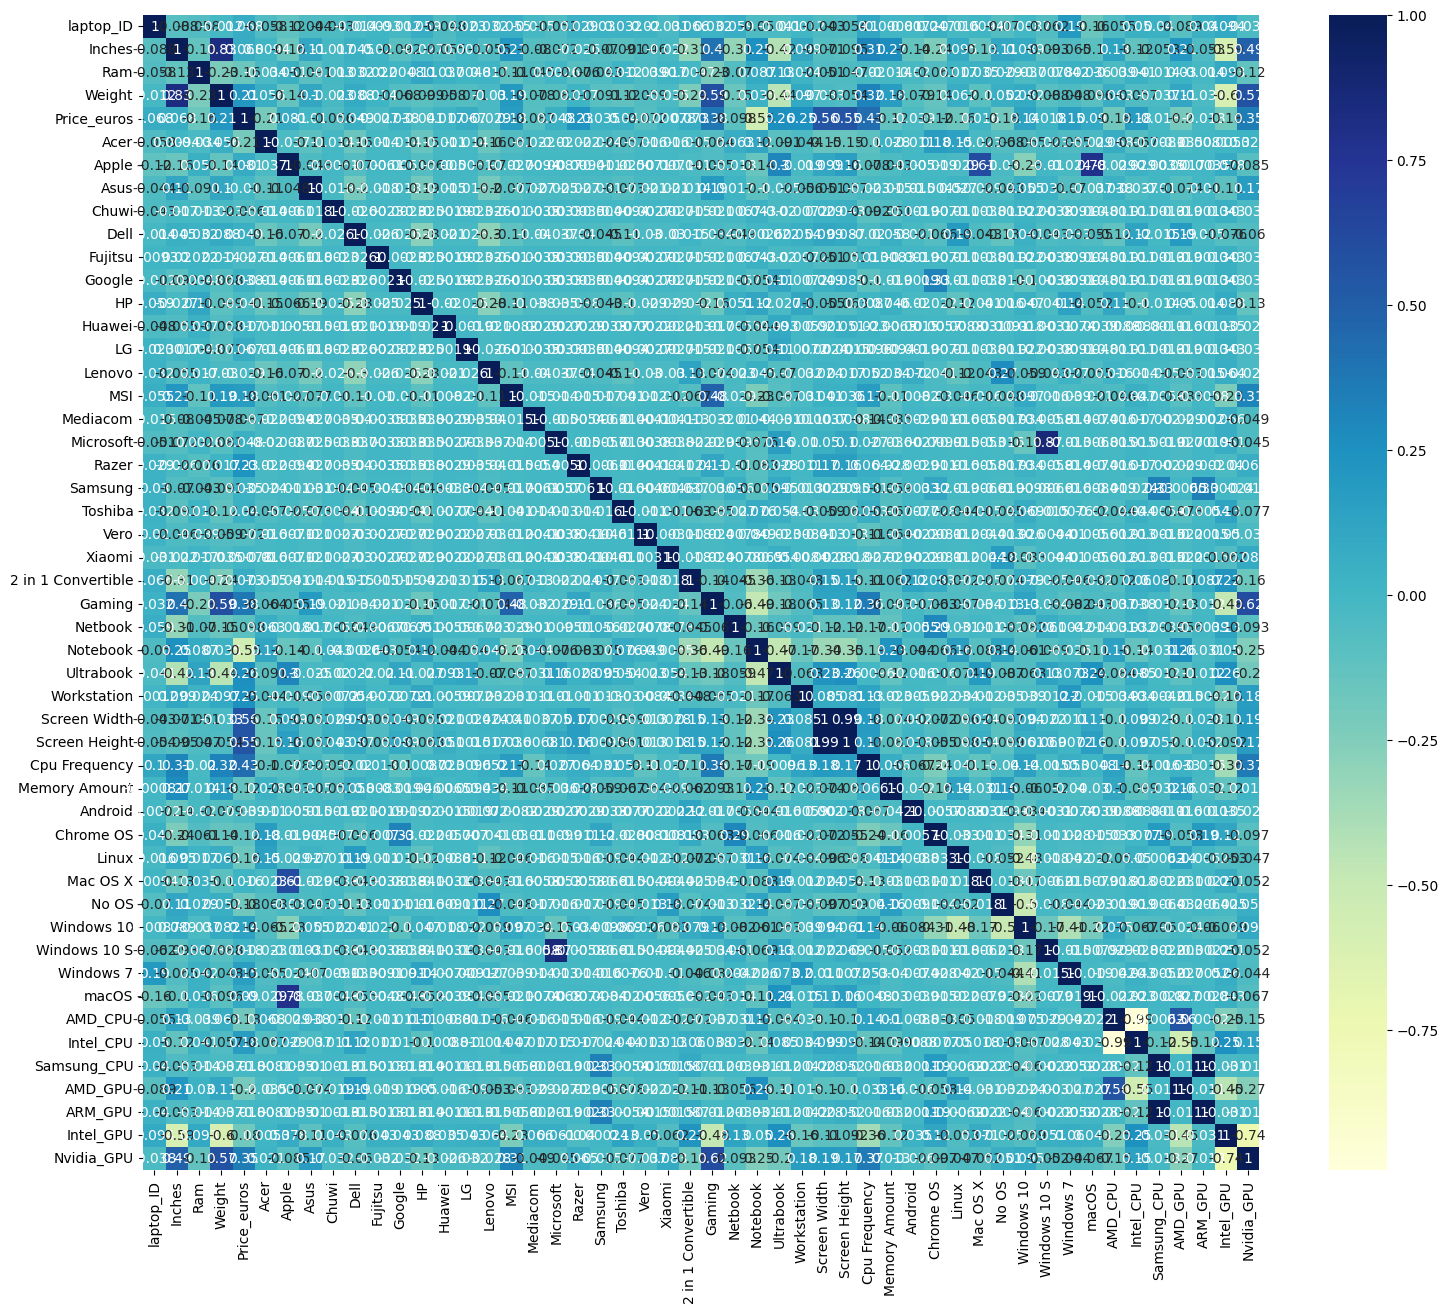

In [286]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18,15))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')

In [287]:
target_correlations = df.corr()['Price_euros'].apply(abs).sort_values()

C:\Users\hp\AppData\Local\Temp\ipykernel_5420\249403010.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  target_correlations = df.corr()['Price_euros'].apply(abs).sort_values()


In [288]:
target_correlations

Xiaomi                0.000776
Asus                  0.010376
Mac OS X              0.015656
Huawei                0.016851
Windows 10 S          0.018312
ARM_GPU               0.018431
Samsung_CPU           0.018431
Fujitsu               0.027135
Lenovo                0.029007
Samsung               0.034584
Google                0.038086
Android               0.038700
Toshiba               0.040339
HP                    0.041291
Microsoft             0.047562
Dell                  0.048509
Chuwi                 0.055646
LG                    0.067053
laptop_ID             0.067830
Inches                0.068197
Vero                  0.071972
2 in 1 Convertible    0.072675
Apple                 0.080688
Mediacom              0.087161
macOS                 0.089928
Netbook               0.097572
Chrome OS             0.118684
Memory Amount         0.122365
Windows 10            0.137048
Windows 7             0.152381
Ram                   0.160503
Linux                 0.162060
No OS   

In [289]:
#select the top 20 features && the most important features
selected_features = target_correlations[-21:].index

In [290]:
selected_features = list(selected_features)
selected_features

['Windows 7',
 'Ram',
 'Linux',
 'No OS',
 'MSI',
 'AMD_CPU',
 'Intel_CPU',
 'Intel_GPU',
 'AMD_GPU',
 'Acer',
 'Weight',
 'Razer',
 'Workstation',
 'Ultrabook',
 'Nvidia_GPU',
 'Gaming',
 'Cpu Frequency',
 'Notebook',
 'Screen Height',
 'Screen Width',
 'Price_euros']

In [291]:
limited_df = df[selected_features]

limited_df.head(5)

,Windows 7,Ram,Linux,No OS,MSI,AMD_CPU,Intel_CPU,Intel_GPU,AMD_GPU,Acer,...,Razer,Workstation,Ultrabook,Nvidia_GPU,Gaming,Cpu Frequency,Notebook,Screen Height,Screen Width,Price_euros
0,0,8,0,0,0,0,1,1,0,0,...,0,0,1,0,0,2.3,0,1600,2560,1339.69
1,0,8,0,0,0,0,1,1,0,0,...,0,0,1,0,0,1.8,0,900,1440,898.94
2,0,8,0,1,0,0,1,1,0,0,...,0,0,0,0,0,2.5,1,1080,1920,575.00
3,0,1,0,0,0,0,1,0,1,0,...,0,0,1,0,0,2.7,0,1800,2880,2537.45
4,0,8,0,0,0,0,1,1,0,0,...,0,0,1,0,0,3.1,0,1600,2560,1803.60


<Axes: >

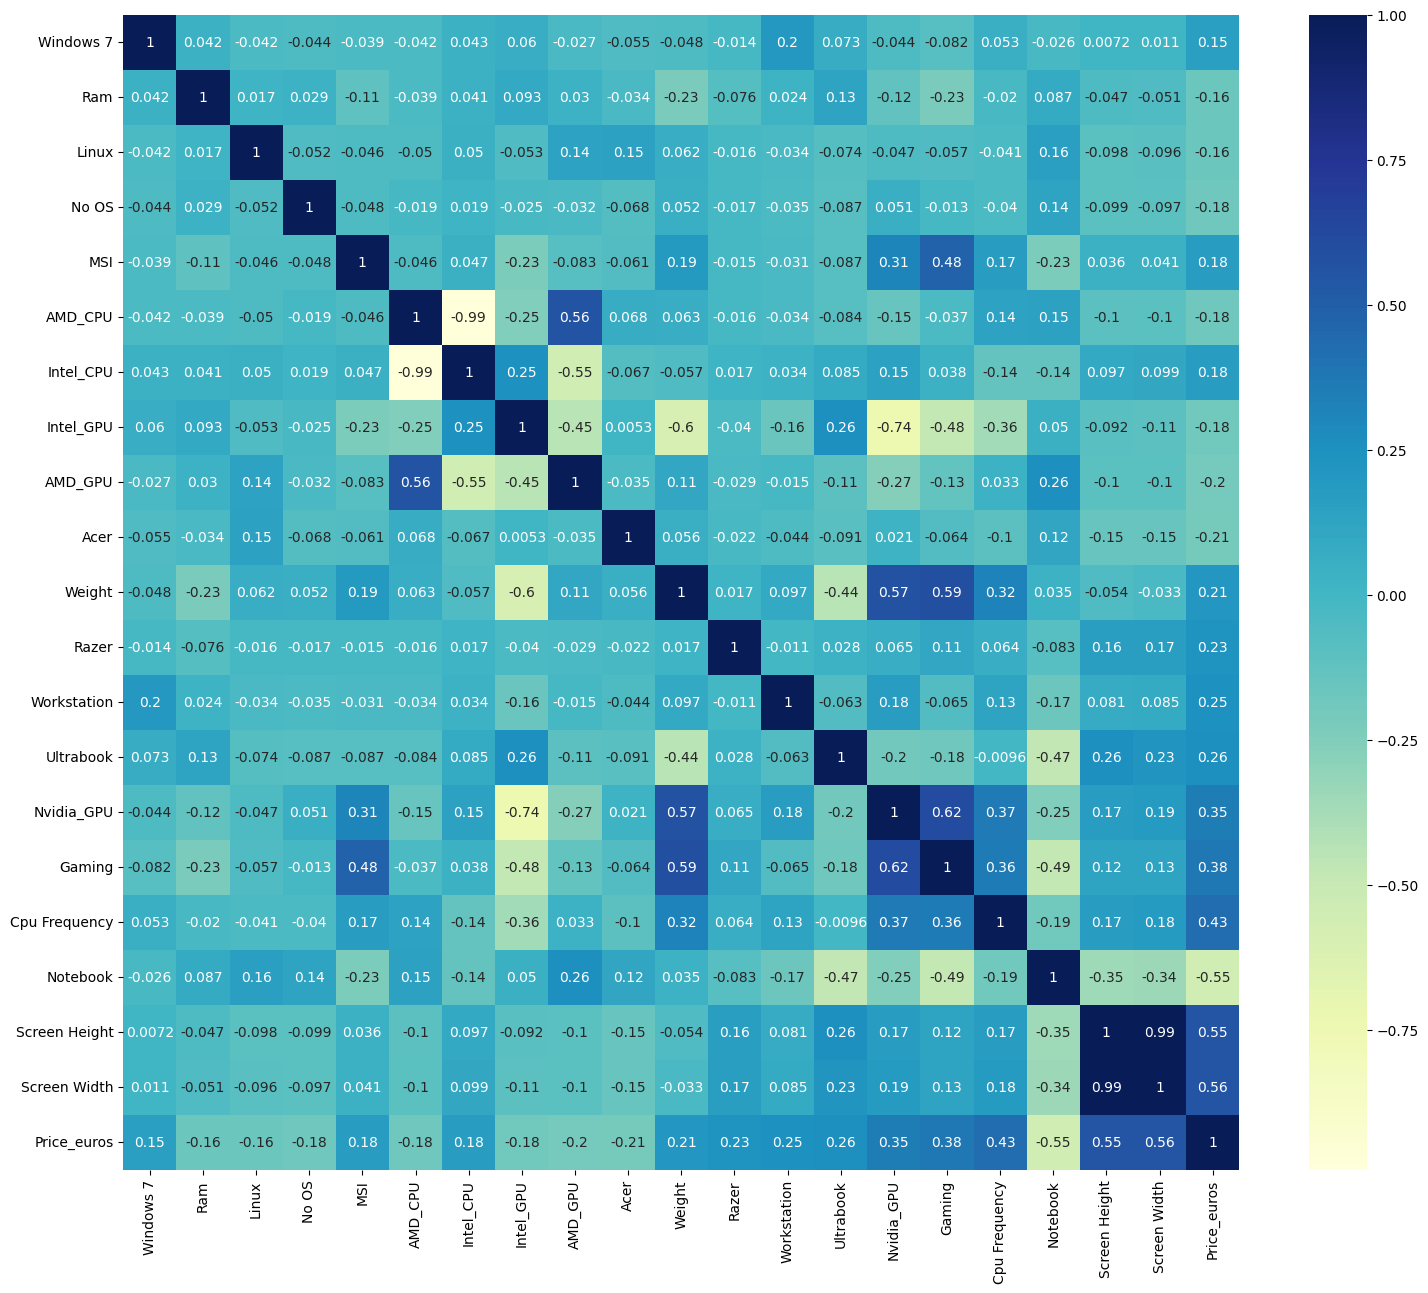

In [292]:
plt.figure(figsize=(18,15))
sns.heatmap(limited_df.corr(), annot=True, cmap='YlGnBu')

2- train a simple model

In [293]:
# applying the random forest regression (decission trees)
# the sturcture of the dataset is likey to perform well with random forest

In [297]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X, y = limited_df.drop('Price_euros', axis=1), limited_df['Price_euros']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [298]:
forest = RandomForestRegressor()

forest.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [299]:
forest.score(X_test_scaled, y_test)

0.7795804415960194

In [300]:
y_pred = forest.predict(X_test_scaled)

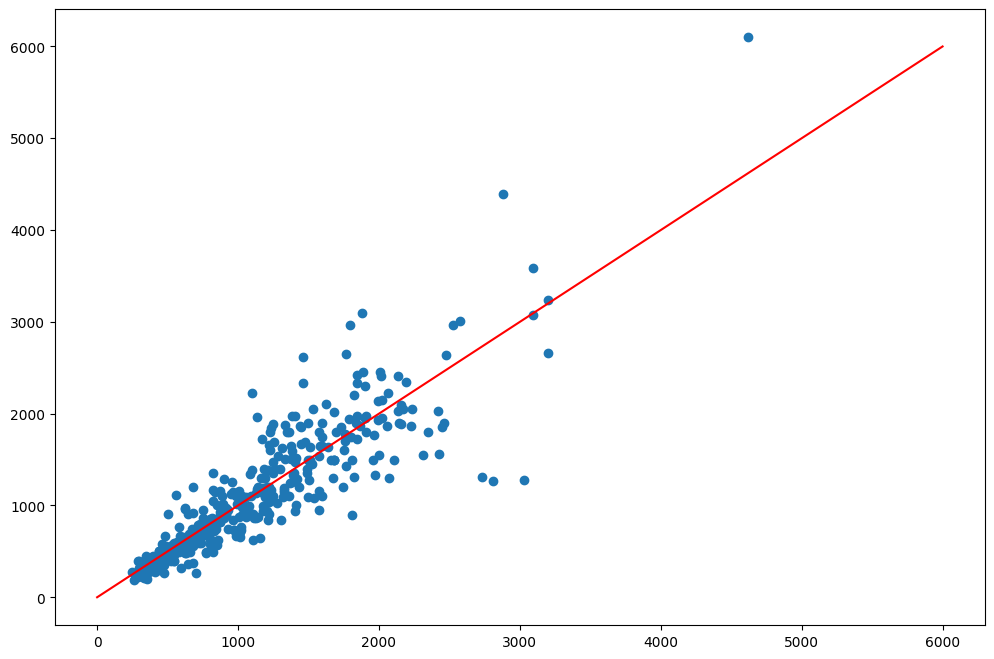

In [302]:
plt.figure(figsize=(12,8))
#draw the points
plt.scatter(y_pred, y_test)
#draw the line
plt.plot(range(0, 6000), range(0, 6000), c='r')

In [303]:
X_test.iloc[0]

Windows 7           0.000
Ram                 8.000
Linux               0.000
No OS               0.000
MSI                 0.000
AMD_CPU             0.000
Intel_CPU           1.000
Intel_GPU           1.000
AMD_GPU             0.000
Acer                0.000
Weight              1.252
Razer               0.000
Workstation         0.000
Ultrabook           1.000
Nvidia_GPU          0.000
Gaming              0.000
Cpu Frequency       2.800
Notebook            0.000
Screen Height    1504.000
Screen Width     2256.000
Name: 670, dtype: float64

In [306]:
X_new_scaled = scaler.transform([X_test.iloc[0]])

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [307]:
forest.predict(X_new_scaled)

array([1867.85913333])

In [308]:
y_test.iloc[0]

1867.85